# Prediction on whether a payment by a company to a medical doctor or facility was made part of the project or not 

### Data Importing and Summary

In [41]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Research=pd.read_csv("../HW3/PGYR17_P011819/OP_DTL_RSRCH_PGYR2017_P01182019.csv", index_col="Record_ID")
General= pd.read_csv('../HW3/PGYR17_P011819/OP_DTL_GNRL_PGYR2017_P01182019.csv', index_col="Record_ID")

# Task 1 Identify Features

In [91]:
Temp=(Research.isna().sum()<60000)
Truncate_Research=Research.iloc[:,Temp.values]


In [92]:
Temp=General.isna().sum()<10000000
Truncate_General=General.iloc[:,Temp.values]

In [93]:
common=set(Truncate_General).intersection(set(Truncate_Research))

In [94]:
Truncate_Research.shape

(602530, 32)

In [95]:
Truncate_General.shape

(10663833, 49)

In [96]:
len(common)

19

In [97]:
Research_common=Truncate_Research[list(common)]

In [103]:
General_common=Truncate_General[list(common)]

In [104]:
General_common.shape

(10663833, 19)

In [105]:
Research_common.shape

(602530, 19)

In [106]:
### Mearge data 
data=pd.concat([General_common, Research_common], verify_integrity=True)

In [107]:
# Add Target to the data 
Target=[0]*len(General_common)+[1]*len(Research_common)
data['Target']=Target

In [108]:
data.shape

(11266363, 20)

In [109]:
data.columns

Index(['Related_Product_Indicator', 'Dispute_Status_for_Publication',
       'Recipient_Zip_Code', 'Date_of_Payment', 'Covered_Recipient_Type',
       'Recipient_State', 'Recipient_Country',
       'Recipient_Primary_Business_Street_Address_Line1', 'Program_Year',
       'Delay_in_Publication_Indicator', 'Payment_Publication_Date',
       'Recipient_City',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
       'Change_Type', 'Form_of_Payment_or_Transfer_of_Value',
       'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
       'Total_Amount_of_Payment_USDollars',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
       'Target'],
      dtype='object')

In [135]:
data.to_csv("./DATA.csv")

The first step after loading the data we delete the columns in each file with more than 90% missing values.
Second, we intersect the two files and use the common features of two classes as candidate features.
Third, we merge two files together and add a target column in the dataframe. We assign the minority as positive 1, and the majority as negative 0. 

After preliminary processing we found:

The dataset is highly skewed about 5:95 

The usable dataset size is 11266363 and have 20 features. 

### Data exploration 

In [136]:
data=pd.read_csv("./DATA.csv")
#data['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID']=data['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID'].astype(str)

In [137]:
D=data.loc[:,data.dtypes!= object]
D_R=D.iloc[list((D['Target']==1).values),:]
D_R['Total_Amount_of_Payment_USDollars'].describe()

count    6.025300e+05
mean     7.568244e+03
std      1.148221e+05
min      1.000000e-02
25%      1.420000e+02
50%      8.089200e+02
75%      3.266910e+03
max      5.910413e+07
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [138]:
D=data.loc[:,data.dtypes!= object]
D_G=D.iloc[list((D['Target']==0).values),:]
D_G['Total_Amount_of_Payment_USDollars'].describe()

count    1.066383e+07
mean     2.638836e+02
std      2.213081e+04
min      1.000000e-02
25%      1.154000e+01
50%      1.565000e+01
75%      2.454000e+01
max      2.684237e+07
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [140]:
from sklearn.model_selection import train_test_split
y=data['Target'].values
X_train, X_test, y_train, y_test = train_test_split(data,y, stratify=y,test_size=0.01,shuffle=True)

In [141]:
X_test.to_csv("./t1.csv",index=False )

In [142]:
import pandas as pd 
import numpy as np
X_test=pd.read_csv("./t1.csv")
X_test=X_test.drop(columns='Recipient_Primary_Business_Street_Address_Line1')
# Information leakage!!!!!
X_test=X_test.drop(columns='Change_Type')

In [143]:
X_test.head()

,Record_ID,Related_Product_Indicator,Dispute_Status_for_Publication,Recipient_Zip_Code,Date_of_Payment,Covered_Recipient_Type,Recipient_State,Recipient_Country,Program_Year,Delay_in_Publication_Indicator,Payment_Publication_Date,Recipient_City,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Form_of_Payment_or_Transfer_of_Value,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Total_Amount_of_Payment_USDollars,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Target
0,487611419,Yes,No,35660-4020,10/26/2017,Covered Recipient Physician,AL,United States,2017,No,01/18/2019,SHEFFIELD,United States,SANOFI-AVENTIS U.S. LLC,In-kind items and services,Sanofi and Genzyme US Companies,12.39,100000000076,0
1,471768577,Yes,No,93726-4040,01/16/2017,Covered Recipient Physician,CA,United States,2017,No,01/18/2019,FRESNO,United States,"AbbVie, Inc.",In-kind items and services,"AbbVie, Inc.",11.47,100000000204,0
2,457280615,Yes,No,28144,11/28/2017,Covered Recipient Physician,NC,United States,2017,No,01/18/2019,SALISBURY,United States,"Lilly USA, LLC",In-kind items and services,Eli Lilly and Company,11.90,100000000066,0
3,432020625,Yes,No,23229,11/08/2017,Covered Recipient Physician,VA,United States,2017,No,01/18/2019,HENRICO,United States,ZOLL Services LLC (A/K/A ZOLL LifeCor Corp),Cash or cash equivalent,ZOLL Services LLC (A/K/A ZOLL LifeCor Corp),16.57,100000000178,0
4,454922889,Yes,No,8037,11/21/2017,Covered Recipient Physician,NJ,United States,2017,No,01/18/2019,HAMMONTON,United States,"Collegium Pharmaceutical, Inc.",Cash or cash equivalent,"Collegium Pharmaceutical, Inc.",11.95,100000151565,0


In [144]:
Data_cat=X_test.loc[:,X_test.dtypes== object]
Data_con=X_test.loc[:,X_test.dtypes!= object]

In [145]:
list(Data_con)

['Record_ID',
 'Program_Year',
 'Total_Amount_of_Payment_USDollars',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
 'Target']

There are 5 columns having continous data type. After reading documents, 'Record_ID' is unique for every row, 'Program_Year' is all the same for every payment, 'Target' is our prediction target, so the only useful continous feature kept is 'Total_Amount_of_Payment_USDollars' 

In [146]:
Data_con_R=Data_con.iloc[list((Data_con['Target']==1).values),:]
Data_con_R['Total_Amount_of_Payment_USDollars'].describe()

count    6.025000e+03
mean     6.964667e+03
std      3.344510e+04
min      1.500000e-01
25%      1.422000e+02
50%      8.000000e+02
75%      3.462000e+03
max      1.253938e+06
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [147]:
Data_con_G=Data_con.iloc[list((Data_con['Target']==0).values),:]
Data_con_G['Total_Amount_of_Payment_USDollars'].describe()

count    1.066390e+05
mean     2.302577e+02
std      7.839942e+03
min      1.000000e-02
25%      1.156000e+01
50%      1.564000e+01
75%      2.449000e+01
max      1.787686e+06
Name: Total_Amount_of_Payment_USDollars, dtype: float64

After sumarizing the 'Total_Amount_of_Payment_USDollars' between 'General' and 'Research', we found the two classes have different distribution, for example the mean for 'Research' is significantly higher than 'General', so we expect this feature should be a good indicator of our target.

### Visualize Category data 

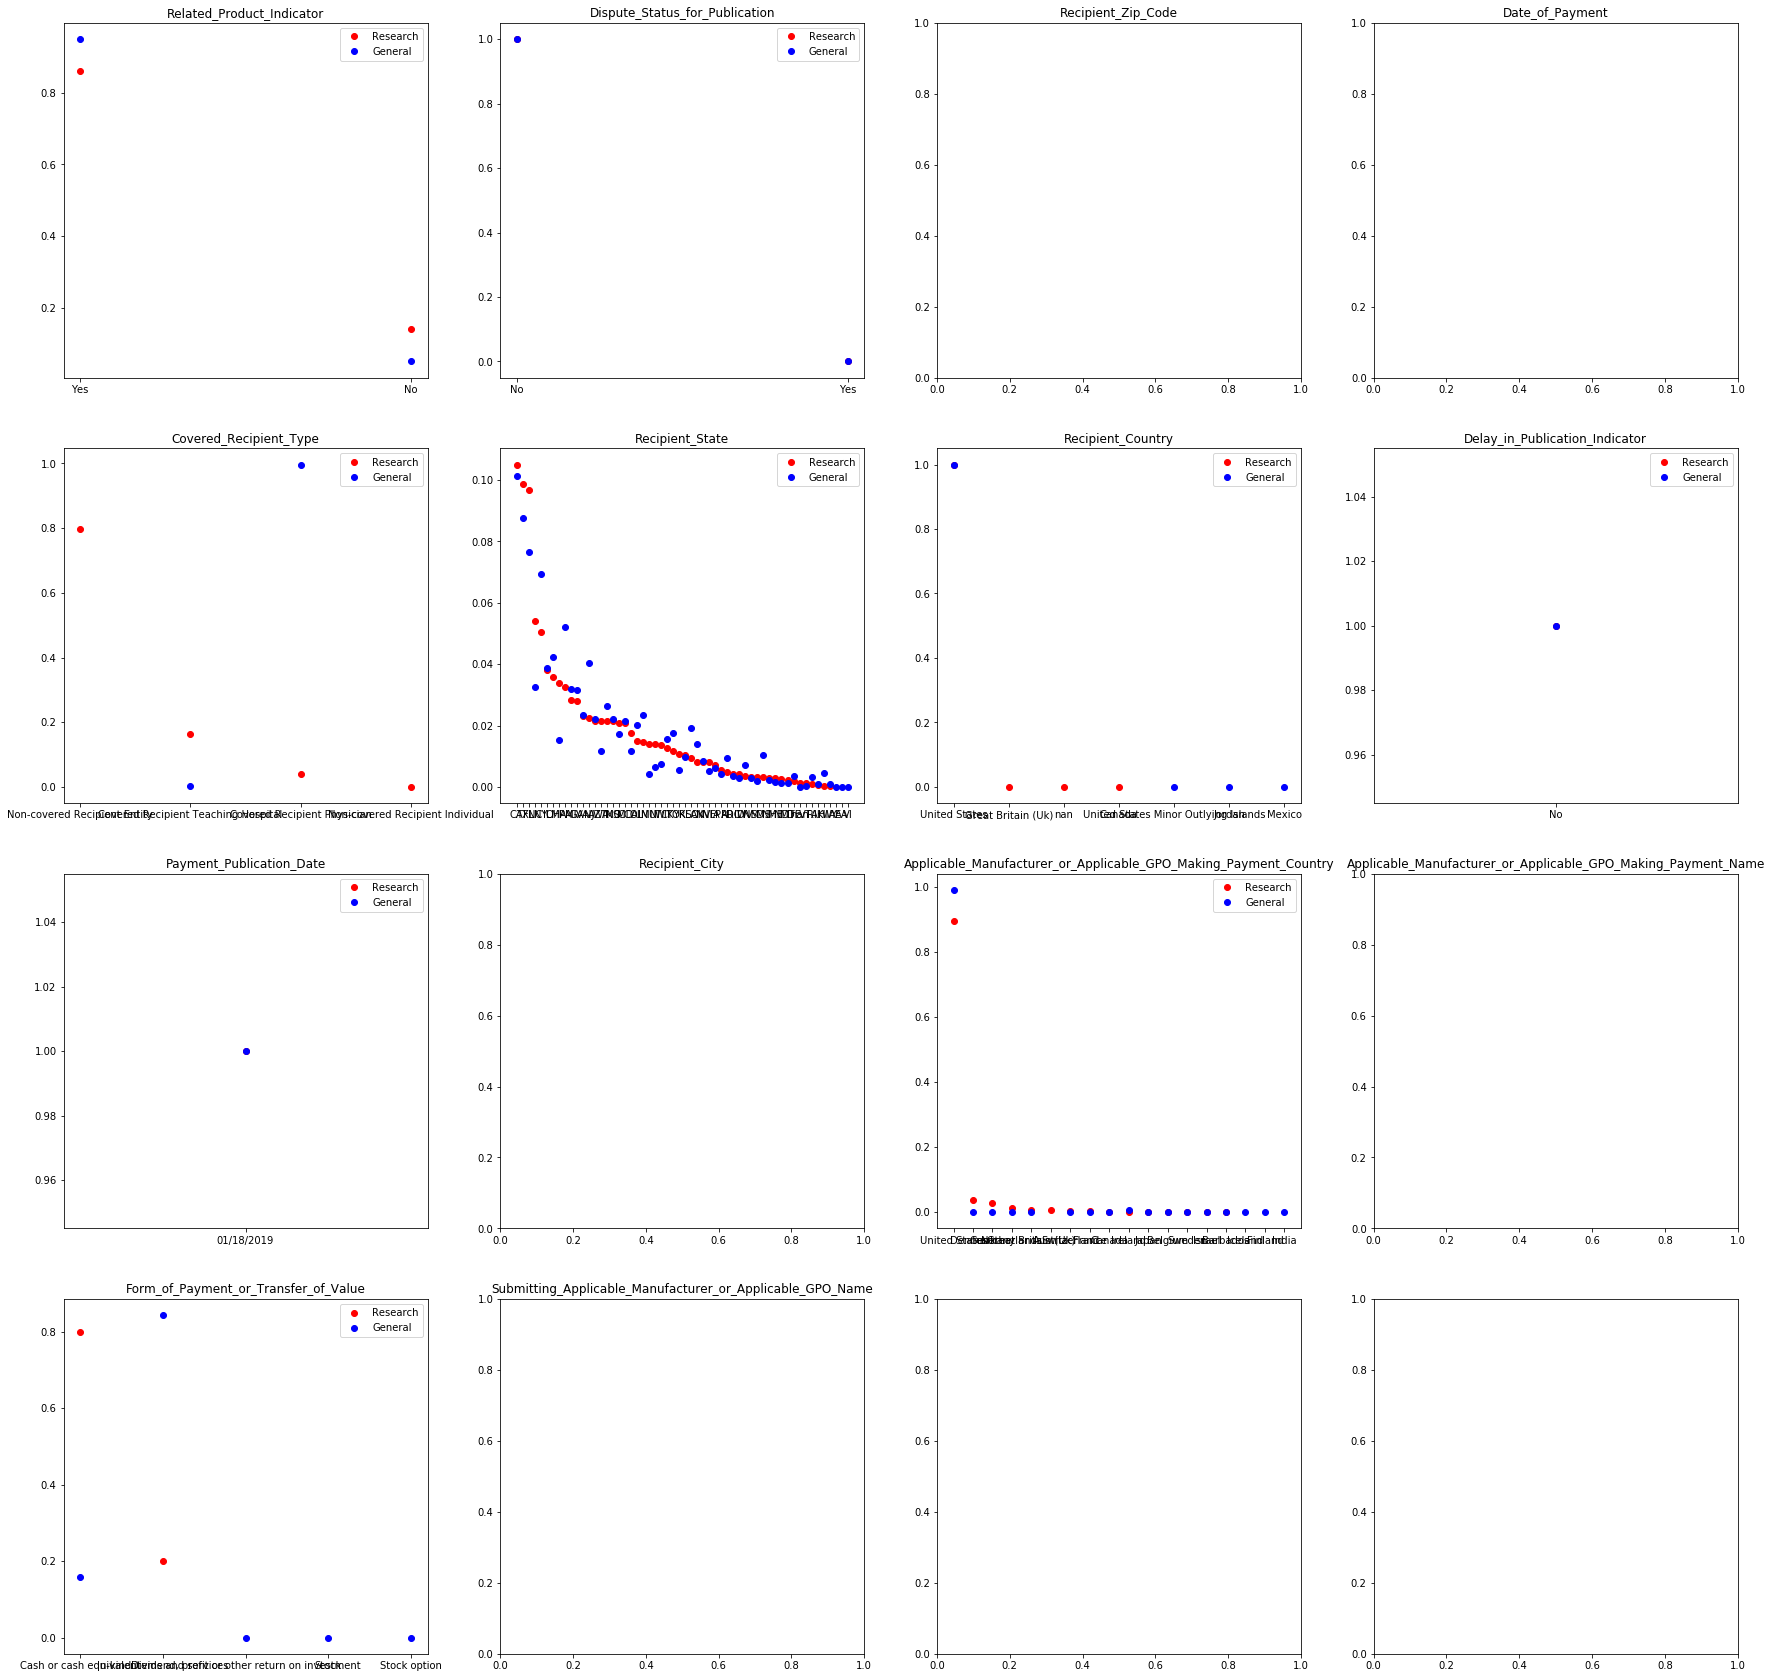

In [148]:
head=list(Data_cat)
Data_cat_R=Data_cat.iloc[list((Data_con['Target']==1).values),:].astype(str)
Data_cat_G=Data_cat.iloc[list((Data_con['Target']==0).values),:].astype(str)
fig, axes = plt.subplots(4, 4, figsize=(30, 30))
for i, ax in enumerate(axes.ravel()):
    if i>=len(head):
        break
    j=head[i]
    ax.set_title("{}".format(j))
    if len(Data_cat_G.iloc[:,i].value_counts()/len(Data_cat_G))>300:
        continue
    ax.plot(Data_cat_R[j].value_counts().keys(),Data_cat_R[j].value_counts().values/len(Data_cat_R),'ro',label='Research')
    ax.plot(Data_cat_G[j].value_counts().keys(),Data_cat_G[j].value_counts().values/len(Data_cat_G),'bo',label='General')
    ax.legend()
    #ax.set_title("{}".format(j))

### Understanding the scatter plot:
    
The picture above plots the frequency density (frequency/class size) of each categorical feature in two classes. Intuitively, if the red dots and blue dots are far away each other then the feature should be ideal.

If the categories is more than 300, they will not be shown in the figure.

### Feature Identification:
    
As shown in the picture, featuers such as 'Delay_in_Publication_Indicator', 'Payment_Publication_Date', 'Dispute_Status_for_Publication'are all the same for both 'General' and 'Research', which cannot distinguish the target at all, so we remove these three features. 

Information leakage: 

After researching on the application process and reading the data dictionaries, we found that some features can only be collected after knowing the target, such as 'Covered_Recipient_Type' and 'Payment'

1 'Covered_Recipient_Type' should be deleted because of leaking the information of target. 

2 'Change Type' also leaks information of target because records for all three payment categories (general, research, physician ownership) include a Change Type indicator that explains the record’s status relating to previous publication. 

3 'Date of Payment' should happen after the knowing the type of payment, so it should be deleted. 


# Task 2 Preprocessing and Baseline Model


In [149]:
# drop irrelevant features 
head=set(Data_cat)
features=(head-set(['Delay_in_Publication_Indicator','Payment_Publication_Date','Dispute_Status_for_Publication','Covered_Recipient_Type','Covered_Recipient_Type','Date_of_Payment'])).union(set(['Total_Amount_of_Payment_USDollars','Target','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID','Record_ID']))


In [150]:
features

{'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
 'Form_of_Payment_or_Transfer_of_Value',
 'Recipient_City',
 'Recipient_Country',
 'Recipient_State',
 'Recipient_Zip_Code',
 'Record_ID',
 'Related_Product_Indicator',
 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
 'Target',
 'Total_Amount_of_Payment_USDollars'}

In [151]:
X_test_f=X_test[features]

In [152]:
X_test_f.to_csv("./X_test_f.csv",index=False )

In [153]:
import pandas as pd 
import numpy as np
X_test_f=pd.read_csv("./X_test_f.csv",index_col='Record_ID')

In [154]:
X_test_f.head()

,Recipient_Country,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Form_of_Payment_or_Transfer_of_Value,Target,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Related_Product_Indicator,Recipient_Zip_Code,Total_Amount_of_Payment_USDollars,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Recipient_City,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Recipient_State
Record_ID,,,,,,,,,,,,
487611419,United States,United States,In-kind items and services,0,Sanofi and Genzyme US Companies,Yes,35660-4020,12.39,SANOFI-AVENTIS U.S. LLC,SHEFFIELD,100000000076,AL
471768577,United States,United States,In-kind items and services,0,"AbbVie, Inc.",Yes,93726-4040,11.47,"AbbVie, Inc.",FRESNO,100000000204,CA
457280615,United States,United States,In-kind items and services,0,Eli Lilly and Company,Yes,28144,11.90,"Lilly USA, LLC",SALISBURY,100000000066,NC
432020625,United States,United States,Cash or cash equivalent,0,ZOLL Services LLC (A/K/A ZOLL LifeCor Corp),Yes,23229,16.57,ZOLL Services LLC (A/K/A ZOLL LifeCor Corp),HENRICO,100000000178,VA
454922889,United States,United States,Cash or cash equivalent,0,"Collegium Pharmaceutical, Inc.",Yes,8037,11.95,"Collegium Pharmaceutical, Inc.",HAMMONTON,100000151565,NJ


In [155]:
cat_head=list(X_test_f.loc[:,X_test_f.dtypes== object])

In [156]:
# encode category data
#target_e=['Recipient_State','Date_of_Payment','Recipient_Zip_Code','Recipient_City','Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name']
cat_head=list(X_test_f.loc[:,X_test_f.dtypes== object])
cat_head.append('Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID')
con_head=list(X_test_f.loc[:,X_test_f.dtypes!= object])
con_head.remove('Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID')
# oridinal encoding all cats 
for i in cat_head:
    X_test_f[i]=X_test_f[i].astype("category").cat.codes

In [157]:
feilds=list(X_test_f)
feilds.remove("Target")
#feilds
X_train,X_test,y_train,y_test=train_test_split(X_test_f[feilds],X_test_f.Target)

### ordinal encoding data + without undersample + without standardize data+ Logistic Regression

In [158]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
scores = cross_validate(LogisticRegression(),
                        X_train, y_train, cv=10,
                        scoring=('roc_auc','accuracy','average_precision','recall','f1'))

print("-------test_roc_auc------\n"+str(scores['test_roc_auc'].mean()))
print("-------test_accuracy------\n"+str(scores['test_accuracy'].mean()))
print("-------test_average_precision------\n"+str(scores['test_average_precision'].mean()))
print("-------test_f1------\n"+str(scores['test_f1'].mean()))
print("-------recall------\n"+str(scores['test_recall'].mean()))

-------test_roc_auc------
0.909933809455015
-------test_accuracy------
0.9487324404503082
-------test_average_precision------
0.4286530149646217
-------test_f1------
0.16434592634910367
-------recall------
0.09412112116957934


As the result shows, the prediction accuracy is very high in baseline model however the f1 score and recall are very low which are because of the imbalance of dataset. To tackle this problem, we have to undersampling data.

### Undersample data 

In [159]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.under_sampling import RandomUnderSampler
undersample_pipe = make_imb_pipeline(RandomUnderSampler(), LogisticRegression())
scores = cross_validate(undersample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc','accuracy','average_precision','recall','f1'))
print("-------test_roc_auc------\n"+str(scores['test_roc_auc'].mean()))
print("-------test_accuracy------\n"+str(scores['test_accuracy'].mean()))
print("-------test_average_precision------\n"+str(scores['test_average_precision'].mean()))
print("-------test_f1------\n"+str(scores['test_f1'].mean()))
print("-------recall------\n"+str(scores['test_recall'].mean()))

-------test_roc_auc------
0.9208043935725865
-------test_accuracy------
0.8504818058346559
-------test_average_precision------
0.4634626864180672
-------test_f1------
0.37870451233447755
-------recall------
0.845386551774217


After undersampling the data, the recall and f1 score increase significantly in baseline model 

### Oversamepling data 

In [160]:
from imblearn.over_sampling import RandomOverSampler

oversample_pipe = make_imb_pipeline(RandomOverSampler(), LogisticRegression())
scores = cross_validate(oversample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc','accuracy','average_precision','recall','f1'))
print("-------test_roc_auc------\n"+str(scores['test_roc_auc'].mean()))
print("-------test_accuracy------\n"+str(scores['test_accuracy'].mean()))
print("-------test_average_precision------\n"+str(scores['test_average_precision'].mean()))
print("-------test_f1------\n"+str(scores['test_f1'].mean()))
print("-------recall------\n"+str(scores['test_recall'].mean()))


-------test_roc_auc------
0.9195808896958197
-------test_accuracy------
0.8468365594804667
-------test_average_precision------
0.4638061144088236
-------test_f1------
0.3729755760255709
-------recall------
0.8453860676768166


Undersampling data is better than oversampling data. First, undersampling brings faster computation. Second, the prediction performance is similar with oversampling. Thus, in the following sections, we are going to use undersampling results to train the the model. 

# Task 3 Feature Engineering 

### Feature encoding






As shown in the scatter plot, some features, such as 'Recipient_State','Date_of_Payment','Recipient_Zip_Code','Recipient_City','Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name' have more than 100 categories which needs target encoding. For features such as 'Recipient_Country' only have 4 classes so they can be one-hot encoded.



In [161]:
target_e={'Recipient_State','Date_of_Payment','Recipient_Zip_Code','Recipient_City','Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID'}
continuous={'Total_Amount_of_Payment_USDollars'}
one_hot=set(X_train)-target_e-continuous

target_id=set()
one_hot_id=set()
continuous_id=set()
for index, value in enumerate(list(X_train)):
    if value in target_e:
        target_id.add(index)
    elif value in one_hot:
        one_hot_id.add(index)
    else:
        continuous_id.add(index)

In [162]:
one_hot

{'Form_of_Payment_or_Transfer_of_Value',
 'Recipient_Country',
 'Related_Product_Indicator'}

In [163]:
target_e

{'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
 'Date_of_Payment',
 'Recipient_City',
 'Recipient_State',
 'Recipient_Zip_Code',
 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'}

### Build a pipeline One-hot encoding + target encoding+ standardize data+Logistic regression 

In [164]:
### Build a pipeline:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
  ('scaler', StandardScaler())])

categorical_transformer_target=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('target', TargetEncoder(handle_unknown='impute'))])

categorical_transformer_one_hot=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))])


continuous=np.array(list(continuous_id))

categorical_target=np.array(list(target_id))

categorical_one_hot=np.array(list(one_hot_id))


preprocessor= ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,continuous),
        ('cat_target', categorical_transformer_target, categorical_target),
        ('cat_onehot', categorical_transformer_one_hot, categorical_one_hot)
    ])

clf_L=make_imb_pipeline(RandomUnderSampler(),preprocessor,LogisticRegression())

scores = cross_validate(clf_L,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc','accuracy','average_precision','recall','f1'))

print("-------test_roc_auc------\n"+str(scores['test_roc_auc'].mean()))
print("-------test_accuracy------\n"+str(scores['test_accuracy'].mean()))
print("-------test_average_precision------\n"+str(scores['test_average_precision'].mean()))
print("-------test_f1------\n"+str(scores['test_f1'].mean()))
print("-------recall------\n"+str(scores['test_recall'].mean()))


-------test_roc_auc------
0.9230212336296638
-------test_accuracy------
0.8443987610719539
-------test_average_precision------
0.464535738511224
-------test_f1------
0.3703157829934921
-------recall------
0.8489112649465073


### Target encoding vs Orindal encoding 

After practicing categorical data encoding, the recall of model is improved

# Task 4  Any model

Use any classification model we discussed (trees, forests, gradient boosting, SVM) to improve
your result. You can (and probably should) change your preprocessing and feature engineering
to be suitable for the model. You are not required to try all of these models. Tune parameters
as appropriate.

### Linear SVM 

In [106]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
  ('scaler', StandardScaler())])

categorical_transformer_target=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('target', TargetEncoder(handle_unknown='impute'))])

categorical_transformer_one_hot=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))])


continuous=np.array(list(continuous_id))

categorical_target=np.array(list(target_id))

categorical_one_hot=np.array(list(one_hot_id))


preprocessor= ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,continuous),
        ('cat_target', categorical_transformer_target, categorical_target),
        ('cat_onehot', categorical_transformer_one_hot, categorical_one_hot)
    ])

clf_SVM=make_imb_pipeline(RandomUnderSampler(),preprocessor,LinearSVC())

scores = cross_validate(clf_SVM,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc','accuracy','average_precision','recall','f1'))

print("-------test_roc_auc------\n"+str(scores['test_roc_auc'].mean()))
print("-------test_accuracy------\n"+str(scores['test_accuracy'].mean()))
print("-------test_average_precision------\n"+str(scores['test_average_precision'].mean()))
print("-------test_f1------\n"+str(scores['test_f1'].mean()))
print("-------recall------\n"+str(scores['test_recall'].mean()))

-------test_roc_auc------
0.5089214805400223
-------test_accuracy------
0.5252893730843631
-------test_average_precision------
0.05943112117596981
-------test_f1------
0.0857277698427473
-------recall------
0.4797609670235629


In [137]:
np.logspace(1, 1.8, 10)

array([10.        , 12.2712524 , 15.05836354, 18.47849797, 22.67543126,
       27.82559402, 34.14548874, 41.90079106, 51.41751828, 63.09573445])

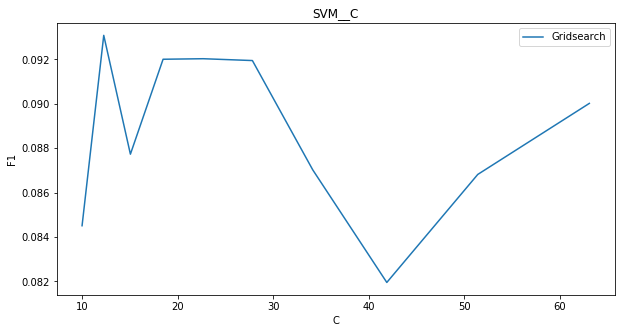

In [128]:
## Tune Parameters
from sklearn.model_selection import GridSearchCV
parameters = {}
param_grid = {'linearsvc__C': np.logspace(1, 1.8, 10).round(2)}
CV_SVM = GridSearchCV(clf_SVM, param_grid, scoring = 'f1',cv=10)
CV_SVM.fit(X_train, y_train)   
L=len(CV_SVM.cv_results_['param_linearsvc__C'])
plt.figure(figsize=(10,5))
plt.plot(CV_SVM.cv_results_['param_linearsvc__C'].data, CV_SVM.cv_results_ ["mean_test_score"],label="Gridsearch")
#plt.plot(CV_R.cv_results_["param_Ridge__alpha"].data,[0.863]*L,"red",label="base")
plt.title("SVM__C")
plt.xlabel("C")
plt.ylabel("F1")
plt.legend()

### GBDT

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GBDT=make_imb_pipeline(RandomUnderSampler(),preprocessor,GradientBoostingClassifier(n_estimators=10, learning_rate=0.1,max_depth=2,random_state=0))

scores = cross_validate(clf_GBDT,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc','accuracy','average_precision','recall','f1'))

print("-------test_roc_auc------\n"+str(scores['test_roc_auc'].mean()))
print("-------test_accuracy------\n"+str(scores['test_accuracy'].mean()))
print("-------test_average_precision------\n"+str(scores['test_average_precision'].mean()))
print("-------test_f1------\n"+str(scores['test_f1'].mean()))
print("-------recall------\n"+str(scores['test_recall'].mean()))

-------test_roc_auc------
0.9398123323907466
-------test_accuracy------
0.8856422359812074
-------test_average_precision------
0.43442587208427347
-------test_f1------
0.4520946613015841
-------recall------
0.8792757047971914


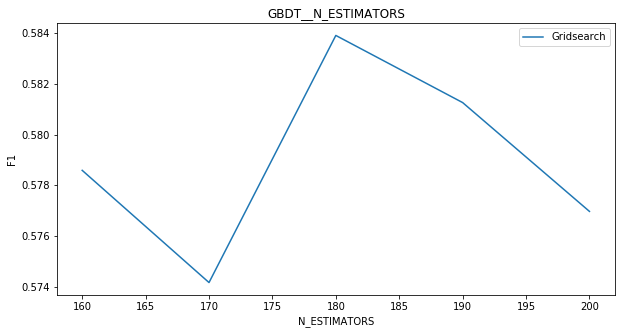

In [161]:
## Tune Parameters n_estimators 
from sklearn.model_selection import GridSearchCV
parameters = {}
param_grid = {'gradientboostingclassifier__n_estimators': np.array(range(160,210,10))}
CV_GBDT = GridSearchCV(clf_GBDT, param_grid, scoring = 'f1')
CV_GBDT.fit(X_train, y_train)   
L=len(CV_GBDT.cv_results_['param_gradientboostingclassifier__n_estimators'])
plt.figure(figsize=(10,5))
plt.plot(CV_GBDT.cv_results_['param_gradientboostingclassifier__n_estimators'].data, CV_GBDT.cv_results_ ['mean_test_score'],label="Gridsearch")
#plt.plot(CV_R.cv_results_["param_Ridge__alpha"].data,[0.863]*L,"red",label="base")
plt.title("GBDT__N_ESTIMATORS")
plt.xlabel("N_ESTIMATORS")
plt.ylabel("F1")
plt.legend()

### RF


In [86]:
from sklearn.ensemble import RandomForestClassifier

clf_RF=make_imb_pipeline(RandomUnderSampler(),preprocessor,RandomForestClassifier(n_estimators=10))

scores = cross_validate(clf_RF,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc','accuracy','average_precision','recall','f1'))

print("-------test_roc_auc------\n"+str(scores['test_roc_auc'].mean()))
print("-------test_accuracy------\n"+str(scores['test_accuracy'].mean()))
print("-------test_average_precision------\n"+str(scores['test_average_precision'].mean()))
print("-------test_f1------\n"+str(scores['test_f1'].mean()))
print("-------recall------\n"+str(scores['test_recall'].mean()))


-------test_roc_auc------
0.9811844817804941
-------test_accuracy------
0.9409571464942375
-------test_average_precision------
0.7070153643582756
-------test_f1------
0.6329332762312825
-------recall------
0.950057141182676


Best Parameter: {'randomforestclassifier__n_estimators': 210}


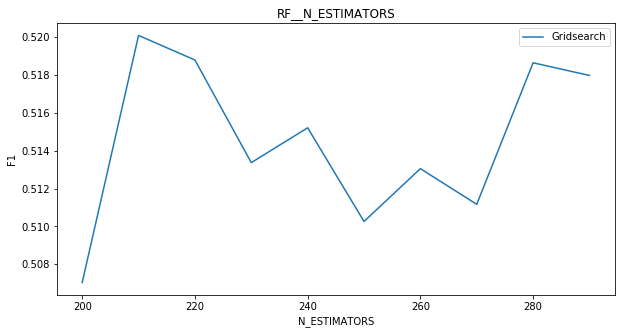

In [200]:
## Tune Parameters of n esitmators 

from sklearn.model_selection import GridSearchCV
parameters = {}
param_grid = {'randomforestclassifier__n_estimators':np.array(range(200,300,10))}
CV_RF = GridSearchCV(clf_RF, param_grid, scoring = 'f1')
CV_RF.fit(X_train, y_train)
print('Best Parameter:', CV_RF.best_params_)
L=len(CV_RF.cv_results_['param_randomforestclassifier__n_estimators'])
plt.figure(figsize=(10,5))
plt.plot(CV_RF.cv_results_['param_randomforestclassifier__n_estimators'].data, CV_RF.cv_results_ ['mean_test_score'],label="Gridsearch")
#plt.plot(CV_R.cv_results_["param_Ridge__alpha"].data,[0.863]*L,"red",label="base")
plt.title("RF__N_ESTIMATORS")
plt.xlabel("N_ESTIMATORS")
plt.ylabel("F1")
plt.legend()


# Task 5 Feature Selections

Identify features that are important for your best model. Which features are most influential,
and which features could be removed without decrease in performance? Does removing
irrelevant features make your model better?

### Covariance Method

In [165]:
categorical_target=np.array(list(target_id) + list(one_hot_id))
categorical_transformer_target=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('target', TargetEncoder(handle_unknown='impute'))])
preprocessor= ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,continuous),
        ('cat_target', categorical_transformer_target, categorical_target)
    ])

X_train_df = preprocessor.fit_transform(X_train,y_train)

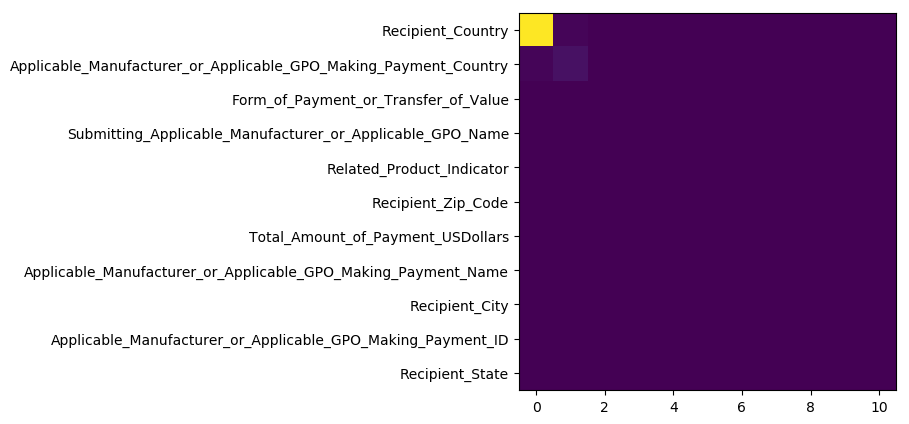

In [166]:
cov = np.cov(X_train_df,rowvar=False)
from scipy.cluster import hierarchy
order = np.array(hierarchy.dendrogram(
    hierarchy.ward(cov),no_plot=True)['ivl'], dtype="int")


plt.figure(figsize=(5, 5), dpi=100)
plt.imshow(cov[order, :][:, order])
# plt.xticks(range(len(X_train_df[0])), list(X_train))
plt.yticks(range(len(X_train_df[0])), list(X_train));

### Plot F-values and p-values

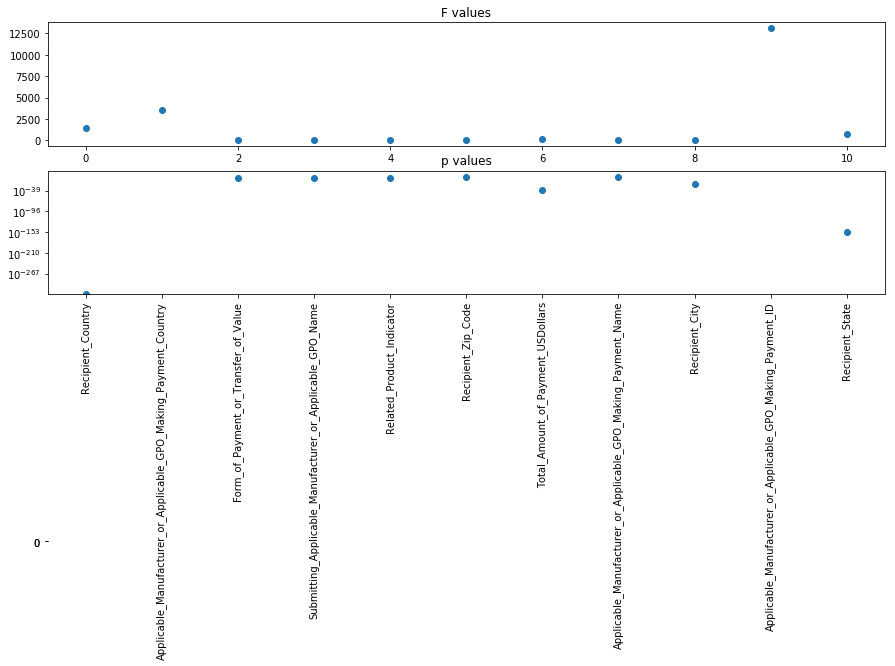

In [167]:
from sklearn.feature_selection import f_classif
f_values, p_values = f_classif(X_train_df, y_train)
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(15,5)
ax[0].set_title("F values")
ax[0].plot(f_values, 'o')
ax[1].set_title("p values")
ax[1].plot(p_values, 'o')
ax[1].set_yscale("log")

ax[1].set_xticks(range(X_train.shape[1]))
ax[1].set_xticklabels(list(X_train),rotation='vertical');


## Select K best features

#### 1. Selecting 9 best features , remove worst 2 features

In [168]:
X_train.head()

,Recipient_Country,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Form_of_Payment_or_Transfer_of_Value,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Related_Product_Indicator,Recipient_Zip_Code,Total_Amount_of_Payment_USDollars,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Recipient_City,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Recipient_State
Record_ID,,,,,,,,,,,
502976181,4,17,2,591,1,7091,12.91,660,4191,125,40
449558507,4,17,2,378,1,20692,0.86,436,6149,149,24
478089727,4,17,2,71,1,13091,119.99,77,3277,78,11
467445117,4,17,2,677,1,6132,20.49,770,7369,683,40
447241655,4,17,2,822,1,28749,62.84,931,3021,25,46


In [169]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFpr
# from sklearn.svm import LinearSVC
select = SelectKBest(k=9, score_func=f_classif)
select.fit(X_train_df, y_train)
print(X_train_df.shape)
X_train_bestFeat = select.transform(X_train_df)
print(X_train_bestFeat.shape)

(84498, 11)
(84498, 9)


In [170]:
X_train_bestFeat[0]

array([-5.00712594e-02,  1.70000000e+01,  5.91000000e+02,  7.09100000e+03,
        6.60000000e+02,  1.25000000e+02,  4.00000000e+00,  2.00000000e+00,
        1.00000000e+00])

In [171]:
X_train_df[0]

array([-5.00712594e-02,  1.70000000e+01,  5.91000000e+02,  7.09100000e+03,
        6.60000000e+02,  4.19100000e+03,  1.25000000e+02,  4.00000000e+01,
        4.00000000e+00,  2.00000000e+00,  1.00000000e+00])

In [191]:
list(X_train)

['Recipient_Country',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
 'Form_of_Payment_or_Transfer_of_Value',
 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
 'Related_Product_Indicator',
 'Recipient_Zip_Code',
 'Total_Amount_of_Payment_USDollars',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
 'Recipient_City',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
 'Recipient_State']

In [174]:
target_e=['Recipient_State','Date_of_Payment','Recipient_Zip_Code','Recipient_City','Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID']
continuous=['Total_Amount_of_Payment_USDollars']
one_hot=set(X_train)-set(target_e)-set(continuous)
target_e={'Recipient_State','Date_of_Payment','Recipient_Zip_Code','Recipient_City','Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID'}
continuous={'Total_Amount_of_Payment_USDollars'}
one_hot=set(X_train)-target_e-continuous

target_id=set()
one_hot_id=set()
continuous_id=set()
for index, value in enumerate(list(X_train)):
    if value in target_e:
        target_id.add(index)
    elif value in one_hot:
        one_hot_id.add(index)
    else:
        continuous_id.add(index)


In [175]:
# Remove the 2 features
# 'Recipient_Zip_Code' = index 5
# 'Recipient_City' = index 8
target_id.remove(5)
target_id.remove(9)

Re-run the model to test the prediction after removed features

In [178]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
  ('scaler', StandardScaler())])

categorical_transformer_target=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('target', TargetEncoder(handle_unknown='impute'))])

categorical_transformer_one_hot=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))])



continuous=np.array(list(continuous_id))

categorical_target=np.array(list(target_id))

categorical_one_hot=np.array(list(one_hot_id))


preprocessor= ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,continuous),
        ('cat_target', categorical_transformer_target, categorical_target),
        ('cat_onehot', categorical_transformer_one_hot, categorical_one_hot)
    ])


from sklearn.ensemble import RandomForestClassifier

clf_RF=make_imb_pipeline(RandomUnderSampler(),preprocessor,RandomForestClassifier(n_estimators=10))

X_train.drop([X_train.columns[5],X_train.columns[9]],axis=1)
scores = cross_validate(clf_RF,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc','accuracy','average_precision','recall','f1'))

print("-------test_roc_auc------\n"+str(scores['test_roc_auc'].mean()))
print("-------test_accuracy------\n"+str(scores['test_accuracy'].mean()))
print("-------test_average_precision------\n"+str(scores['test_average_precision'].mean()))
print("-------test_f1------\n"+str(scores['test_f1'].mean()))
print("-------recall------\n"+str(scores['test_recall'].mean()))


-------test_roc_auc------
0.9778755943338912
-------test_accuracy------
0.9338800668537524
-------test_average_precision------
0.6686155285344183
-------test_f1------
0.6069692154425327
-------recall------
0.947440092946701


We can notice the Model is behaving very similar and good when compared to origianl model

#### 2. Selecting 8 best features

In [239]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFpr
# from sklearn.svm import LinearSVC
select = SelectKBest(k=8, score_func=f_classif)
select.fit(X_train_df, y_train)
print(X_train_df.shape)
X_train_bestFeat = select.transform(X_train_df)
print(X_train_bestFeat.shape)

(84498, 11)
(84498, 8)


In [240]:
X_train_bestFeat[0]

array([-5.00712594e-02,  1.70000000e+01,  5.91000000e+02,  6.60000000e+02,
        1.25000000e+02,  4.00000000e+00,  2.00000000e+00,  1.00000000e+00])

In [241]:
X_train_df[0]

array([-5.00712594e-02,  1.70000000e+01,  5.91000000e+02,  7.09100000e+03,
        6.60000000e+02,  4.19100000e+03,  1.25000000e+02,  4.00000000e+01,
        4.00000000e+00,  2.00000000e+00,  1.00000000e+00])

In [183]:
list(X_train)

['Recipient_Country',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
 'Form_of_Payment_or_Transfer_of_Value',
 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
 'Related_Product_Indicator',
 'Recipient_Zip_Code',
 'Total_Amount_of_Payment_USDollars',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
 'Recipient_City',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
 'Recipient_State']

In [242]:
target_e=['Recipient_State','Date_of_Payment','Recipient_Zip_Code','Recipient_City','Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID']
continuous=['Total_Amount_of_Payment_USDollars']
one_hot=set(X_train)-set(target_e)-set(continuous)
target_e={'Recipient_State','Date_of_Payment','Recipient_Zip_Code','Recipient_City','Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID'}
continuous={'Total_Amount_of_Payment_USDollars'}
one_hot=set(X_train)-target_e-continuous

target_id=set()
one_hot_id=set()
continuous_id=set()
for index, value in enumerate(list(X_train)):
    if value in target_e:
        target_id.add(index)
    elif value in one_hot:
        one_hot_id.add(index)
    else:
        continuous_id.add(index)


In [245]:
# Remove the 3 features
# 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name' - index 3
# Recipient_Zip_Code'-index 5
# 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'-index 7
target_id.remove(5)
target_id.remove(3)
target_id.remove(7)


Re-run the model with removed features

In [247]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
  ('scaler', StandardScaler())])

categorical_transformer_target=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('target', TargetEncoder(handle_unknown='impute'))])

categorical_transformer_one_hot=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))])



continuous=np.array(list(continuous_id))

categorical_target=np.array(list(target_id))

categorical_one_hot=np.array(list(one_hot_id))


preprocessor= ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,continuous),
        ('cat_target', categorical_transformer_target, categorical_target),
        ('cat_onehot', categorical_transformer_one_hot, categorical_one_hot)
    ])


from sklearn.ensemble import RandomForestClassifier

clf_RF=make_imb_pipeline(RandomUnderSampler(),preprocessor,RandomForestClassifier(n_estimators=10))

X_train.drop([X_train.columns[3],X_train.columns[5],X_train.columns[7]],axis=1)
scores = cross_validate(clf_RF,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc','accuracy','average_precision','recall','f1'))

print("-------test_roc_auc------\n"+str(scores['test_roc_auc'].mean()))
print("-------test_accuracy------\n"+str(scores['test_accuracy'].mean()))
print("-------test_average_precision------\n"+str(scores['test_average_precision'].mean()))
print("-------test_f1------\n"+str(scores['test_f1'].mean()))
print("-------recall------\n"+str(scores['test_recall'].mean()))


-------test_roc_auc------
0.970713828498557
-------test_accuracy------
0.9252408286897367
-------test_average_precision------
0.5935454046411837
-------test_f1------
0.574954727380522
-------recall------
0.9384203901825048


### Mutual Information 

In [193]:
from sklearn.feature_selection import mutual_info_classif
score_mi=mutual_info_classif(X_train_df, y_train, discrete_features='auto', n_neighbors=1, copy=True, random_state=None)


features in order of prioirty from high to low

In [194]:
[list(X_train)[i] for i in list(np.argsort(score_mi)[::-1])]

['Recipient_Country',
 'Related_Product_Indicator',
 'Total_Amount_of_Payment_USDollars',
 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
 'Form_of_Payment_or_Transfer_of_Value',
 'Recipient_Zip_Code',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
 'Recipient_State',
 'Recipient_City',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country']

In [198]:
from sklearn.feature_selection import f_classif
f_values, p_values = f_classif(X_train, y_train)

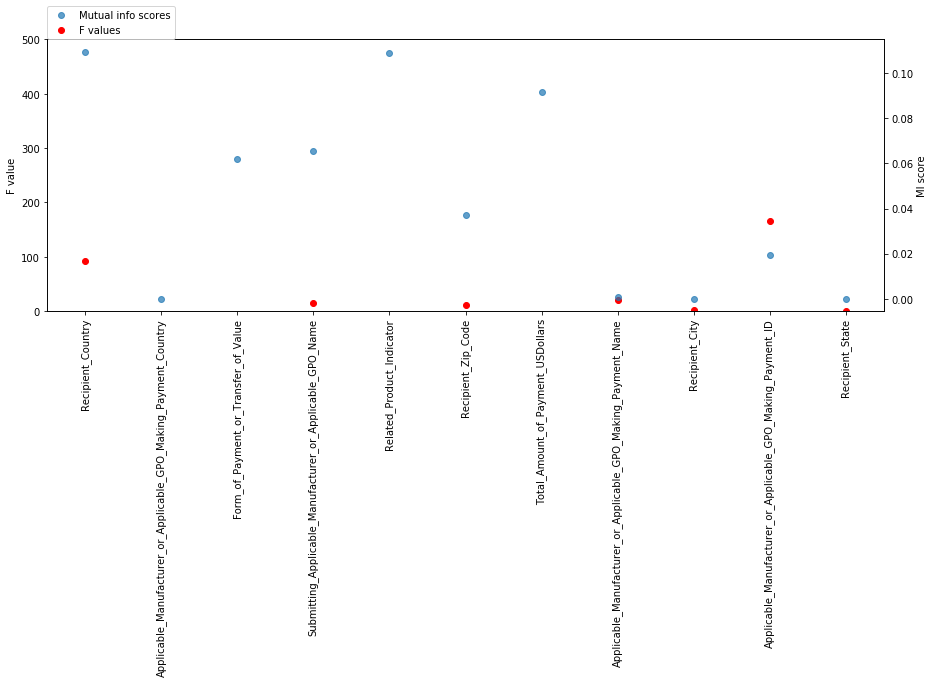

In [199]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(15,5)
line_f, = ax1.plot(f_values, 'o', c='r')
# plt.ylabel("F value")
ax2 = plt.twinx()
line_s, = ax2.plot(score_mi, 'o', alpha=.7)
ax2.set_ylabel("MI score")
ax1.set_xticks(range(len(list(X_train))))
ax1.set_xticklabels(list(X_train),rotation='vertical');
ax1.set_ylabel('F value')
ax1.set_ylim(0,500)
plt.legend([line_s, line_f], ["Mutual info scores", "F values"], loc=(0, 1))

# Task 6 

An explainable model
Can you create an “explainable” model that is nearly as good as your best model?
An explainable model should be small enough to be easily inspected - say a linear model with
few enough coefficients that you can reasonable look at all of them, or a tree with a small
number of leafs etc.

### Trying to simplify our best model Random Forest further

Remove features first

In [263]:
target_e=['Recipient_State','Date_of_Payment','Recipient_Zip_Code','Recipient_City','Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID']
continuous=['Total_Amount_of_Payment_USDollars']
one_hot=set(X_train)-set(target_e)-set(continuous)
target_e={'Recipient_State','Date_of_Payment','Recipient_Zip_Code','Recipient_City','Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country','Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID'}
continuous={'Total_Amount_of_Payment_USDollars'}
one_hot=set(X_train)-target_e-continuous

target_id=set()
one_hot_id=set()
continuous_id=set()
for index, value in enumerate(list(X_train)):
    if value in target_e:
        target_id.add(index)
    elif value in one_hot:
        one_hot_id.add(index)
    else:
        continuous_id.add(index)

#  Removing features    Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Recipient_Zip_Code,Recipient_State,      
target_id.remove(10)
target_id.remove(3)
target_id.remove(5)


In [268]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
  ('scaler', StandardScaler())])

categorical_transformer_target=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('target', TargetEncoder(handle_unknown='impute'))])

categorical_transformer_one_hot=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))])



continuous=np.array(list(continuous_id))

categorical_target=np.array(list(target_id))

categorical_one_hot=np.array(list(one_hot_id))


preprocessor= ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,continuous),
        ('cat_target', categorical_transformer_target, categorical_target),
        ('cat_onehot', categorical_transformer_one_hot, categorical_one_hot)
    ])


from sklearn.ensemble import RandomForestClassifier

clf_RF=make_imb_pipeline(RandomUnderSampler(),preprocessor,RandomForestClassifier(n_estimators=3,max_depth=6))

X_train.drop([X_train.columns[3],X_train.columns[10],X_train.columns[5]],axis=1)
scores = cross_validate(clf_RF,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc','accuracy','average_precision','recall','f1'))

print("-------test_roc_auc------\n"+str(scores['test_roc_auc'].mean()))
print("-------test_accuracy------\n"+str(scores['test_accuracy'].mean()))
print("-------test_average_precision------\n"+str(scores['test_average_precision'].mean()))
print("-------test_f1------\n"+str(scores['test_f1'].mean()))
print("-------recall------\n"+str(scores['test_recall'].mean()))


-------test_roc_auc------
0.9612235900282435
-------test_accuracy------
0.9041867450086846
-------test_average_precision------
0.5837023894902555
-------test_f1------
0.5129376524008925
-------recall------
0.9331413080311759
